# Suicide Rate predicition

**Problem statement:**


---


Using the Suicide dataset which contains countries and its suicides number according to each year. Our motive is to use different variables to predict suicide possibility.

1.To identify variables that affect suicide rate eg country, sex, generation etc

2.To build models to see which one performs better

3.To know the accuracy of the models

## Data Reading

In [3]:
#import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#read data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Term2/Algorithm&Statistic/master.csv")

In [6]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
#Find null values
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [9]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


### Firstly, the HDI fo year column has majority of null values, we can drop the entire column.
### Secondly, country-year is just the same as country and year so dropping it as well

In [10]:
data = data.drop(['HDI for year', 'country-year'], axis = 1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


Renaming the columns for better readability 

In [12]:
data.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicide_rate', 'gdp_for_year', 'gdp_per_capita', 'generation']

In [13]:
data.head()

,country,year,sex,age,suicides_no,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


# Data Visualization

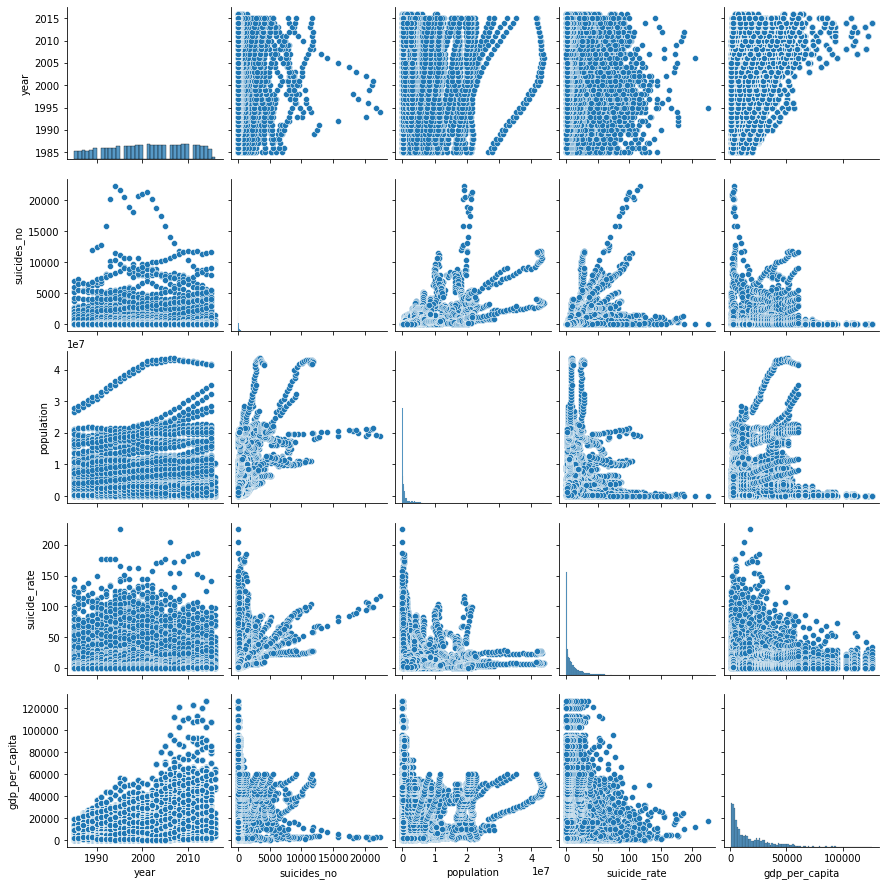

In [14]:
sns.pairplot(data)
plt.show()

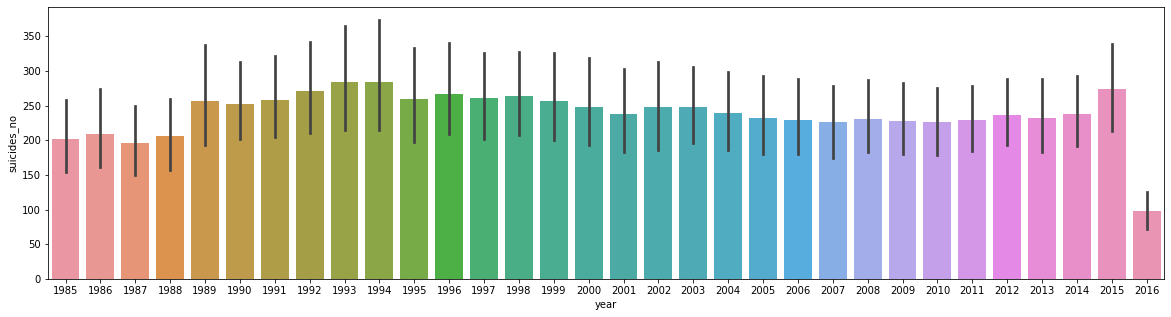

In [16]:
#number of suicide cases in studied years
plt.figure(figsize = (20, 5))
sns.barplot(x='year',y='suicides_no', data = data)
plt.show()

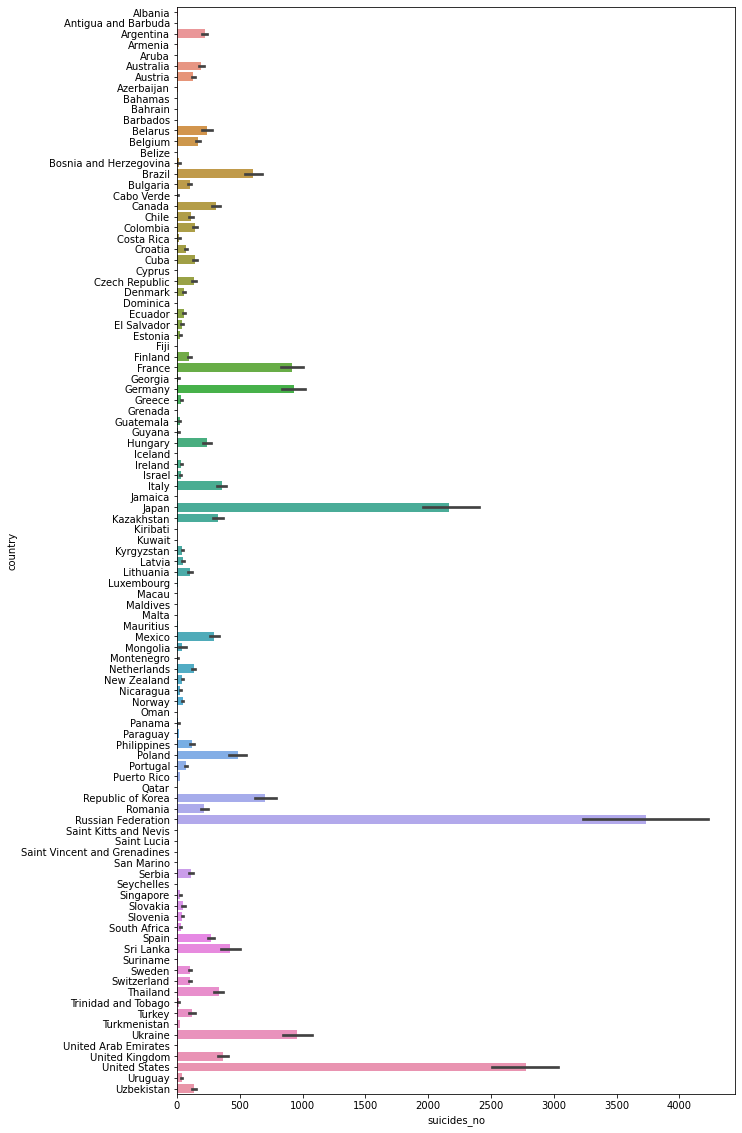

In [17]:
plt.figure(figsize = (10,20))
sns.barplot(x='suicides_no',y='country', data = data)
plt.show()

10 countries with the highest suicided numbers

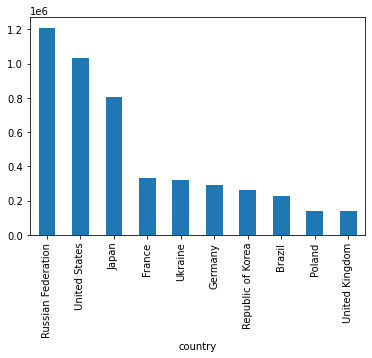

In [18]:
data.groupby("country").suicides_no.sum().sort_values(ascending=False)[:10].plot.bar()

Number of suicides between male and female during examined time. 

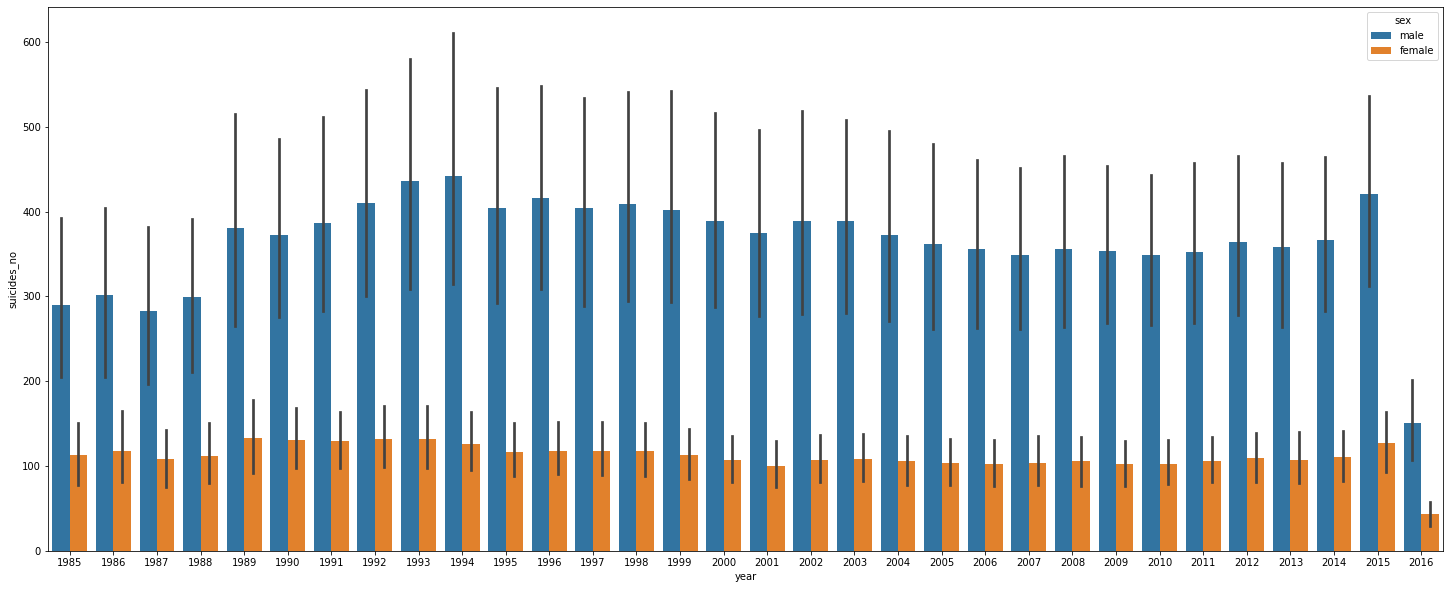

In [19]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 25,10
sns.barplot(x='year',y='suicides_no', data=data,
            hue='sex')
plt.show()

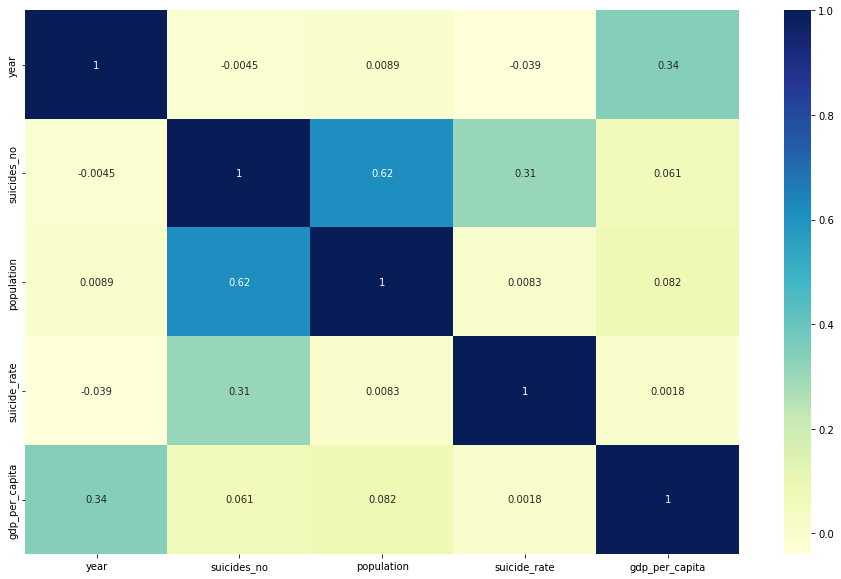

In [20]:
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Data Preparation


---
Converting categorical variables to numerical form is important so that we can fit model. One hot encoding is important.


In [21]:
#Label Encode for Sex
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [22]:
#Sex
sex_cat = data['sex']
sex_encoded = label_encoder.fit_transform(sex_cat)
sex_encoded[0:5]

array([1, 1, 0, 1, 1])

In [23]:
sex_DF = pd.DataFrame(sex_encoded, columns = ['sex'])
sex_DF.head()

,sex
0,1
1,1
2,0
3,1
4,1


In [24]:
#One hot encode 
#Country
newcountry = pd.get_dummies(data['country'])
newcountry.shape

(27820, 101)

In [25]:
data.shape

(27820, 10)

In [26]:
#Age
var = ['age']
# Defining the map function
def binary_map(x):
    return x.map({'5-14 years': 1, "15-24 years": 2,'25-34 years': 3,'35-54 years': 4,'55-74 years': 5,'75+ years': 6 })

In [27]:
data[var] = data[var].apply(binary_map)


In [28]:
data

,country,year,sex,age,suicides_no,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,2,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,4,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,2,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,6,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,3,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,4,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,6,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,1,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,1,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [29]:
#generation
data['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [30]:
#generation 
gen = ['generation']
# Defining the map function
def binary_map(x):
    return x.map({'G.I. Generation': 1, 'Silent': 2, 'Boomers': 3,'Generation X': 4,'Millenials': 5,'Generation Z': 6 })

In [31]:
data[gen] = data[gen].apply(binary_map)

In [32]:
data.head()

,country,year,sex,age,suicides_no,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,2,21,312900,6.71,"2,156,624,900",796,4
1,Albania,1987,male,4,16,308000,5.19,"2,156,624,900",796,2
2,Albania,1987,female,2,14,289700,4.83,"2,156,624,900",796,4
3,Albania,1987,male,6,1,21800,4.59,"2,156,624,900",796,1
4,Albania,1987,male,3,9,274300,3.28,"2,156,624,900",796,3


In [33]:
data['generation'].shape

(27820,)

We need to replace the commas present in gdp for year column as the ML algorithm will read it as a string instead of a numerical value

In [34]:
#gdp_for_year
data['gdp_for_year'] = data['gdp_for_year'].str.replace(',', '').astype(int)

In [35]:
data['gdp_for_year']

0         2156624900
1         2156624900
2         2156624900
3         2156624900
4         2156624900
            ...     
27815    63067077179
27816    63067077179
27817    63067077179
27818    63067077179
27819    63067077179
Name: gdp_for_year, Length: 27820, dtype: int64

In [36]:
data.head()


,country,year,sex,age,suicides_no,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,2,21,312900,6.71,2156624900,796,4
1,Albania,1987,male,4,16,308000,5.19,2156624900,796,2
2,Albania,1987,female,2,14,289700,4.83,2156624900,796,4
3,Albania,1987,male,6,1,21800,4.59,2156624900,796,1
4,Albania,1987,male,3,9,274300,3.28,2156624900,796,3


In [37]:
data = data.drop(['country', 'sex'], axis = 1)
data.head()

,year,age,suicides_no,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,1987,2,21,312900,6.71,2156624900,796,4
1,1987,4,16,308000,5.19,2156624900,796,2
2,1987,2,14,289700,4.83,2156624900,796,4
3,1987,6,1,21800,4.59,2156624900,796,1
4,1987,3,9,274300,3.28,2156624900,796,3


In [38]:
#create new dataframe by concatnating cleaned features
data_dmy = pd.concat([data, sex_DF, newcountry], axis = 1, verify_integrity = True)
data_dmy.head()

,year,age,suicides_no,population,suicide_rate,gdp_for_year,gdp_per_capita,generation,sex,Albania,...,Thailand,Trinidad and Tobago,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan
0,1987,2,21,312900,6.71,2156624900,796,4,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1987,4,16,308000,5.19,2156624900,796,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1987,2,14,289700,4.83,2156624900,796,4,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1987,6,1,21800,4.59,2156624900,796,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1987,3,9,274300,3.28,2156624900,796,3,1,1,...,0,0,0,0,0,0,0,0,0,0


In [39]:
data_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Columns: 110 entries, year to Uzbekistan
dtypes: float64(1), int64(8), uint8(101)
memory usage: 4.6 MB


In [40]:
data_dmy.isnull().sum()

year                    0
age                     0
suicides_no             0
population              0
suicide_rate            0
                       ..
United Arab Emirates    0
United Kingdom          0
United States           0
Uruguay                 0
Uzbekistan              0
Length: 110, dtype: int64

BoxPlots

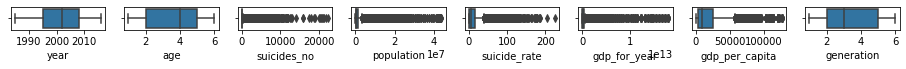

In [41]:
plt.figure(figsize=(20, 10))
col=1
for i in data.columns:
    plt.subplot(20,10,col)
    sns.boxplot(x=data[i])
    col+=1

As we can see, there are some outliers. We can get rid off them by median. Note that when we correct outliers with medians, it creates more outliers because we are changing the distribution of data so thats going to happen

In [42]:
for i in data:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    data.loc[(data[i] < low) | (data[i] > high), i] = data[i].median()

Plotting for outliers again

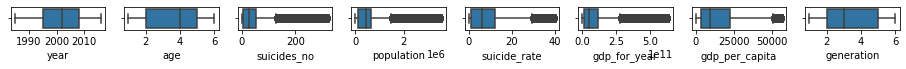

In [43]:
plt.figure(figsize=(20, 10))
col=1
for i in data.columns:
    plt.subplot(20,10,col)
    sns.boxplot(x=data[i])
    col+=1

# Building our models

In [44]:
#  splitting datasets into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_dmy.drop(['suicide_rate'], axis = 1), data_dmy['suicide_rate'], test_size = 0.2, random_state = 0)

##Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [46]:
reg.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = reg.predict(X_test)
y_pred

array([14.54078621, 33.6039003 ,  4.51921788, ..., 30.94437671,
       12.68918849, 14.55808541])

In [48]:
df_reg = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df_reg

,Real Values,Predicted Values
5820,10.31,14.540786
23242,42.77,33.603900
25643,0.88,4.519218
24011,43.67,40.513250
21706,8.87,7.359876
...,...,...
20513,18.27,17.876827
11907,18.05,23.269294
4857,25.68,30.944377
17793,3.28,12.689188


In [49]:
#MAE score
mean_absolute_error(y_test, y_pred)

8.416363931907917

In [50]:
reg.score(X_test,y_test)

0.5169720094323172

##Decision Tree Regression

In [51]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor()

In [52]:
dtreg.fit(X_train, y_train)

DecisionTreeRegressor()

In [53]:
y_pred_dtreg = dtreg.predict(X_test)
y_pred_dtreg

array([ 8.43, 42.3 ,  0.82, ..., 26.27,  3.28,  2.1 ])

In [54]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_dtreg})
df

,Real Values,Predicted Values
5820,10.31,8.43
23242,42.77,42.30
25643,0.88,0.82
24011,43.67,43.23
21706,8.87,8.73
...,...,...
20513,18.27,18.44
11907,18.05,18.14
4857,25.68,26.27
17793,3.28,3.28


In [55]:
mean_absolute_error(y_test, y_pred_dtreg)

0.6421693026599569

In [56]:
dtreg.score(X_test,y_test)

0.9876130011984761

##Random Forest Regression

In [57]:
from sklearn.ensemble import RandomForestRegressor


In [58]:
rfreg = RandomForestRegressor()

In [59]:
rfreg.fit(X_train, y_train)

RandomForestRegressor()

In [60]:
y_pred_rfreg = rfreg.predict(X_test)
y_pred_rfreg

array([10.0862, 41.5769,  0.8576, ..., 25.6155,  3.2897,  2.1128])

In [61]:
df_rfreg = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_rfreg})
df_rfreg

,Real Values,Predicted Values
5820,10.31,10.0862
23242,42.77,41.5769
25643,0.88,0.8576
24011,43.67,43.3410
21706,8.87,8.8711
...,...,...
20513,18.27,18.2603
11907,18.05,18.2678
4857,25.68,25.6155
17793,3.28,3.2897


In [62]:
mean_absolute_error(y_test, y_pred_rfreg)

0.3261308051761323

In [63]:
rfreg.score(X_test,y_test)

0.9915923635592662

#Conclusion

Random Forest Regression is the best model to predict suicide dataset.


# PCA Analysis

In [64]:
from sklearn.decomposition import PCA

In [65]:
pca= PCA(n_components=10)
pca.fit(X_train)

PCA(n_components=10)

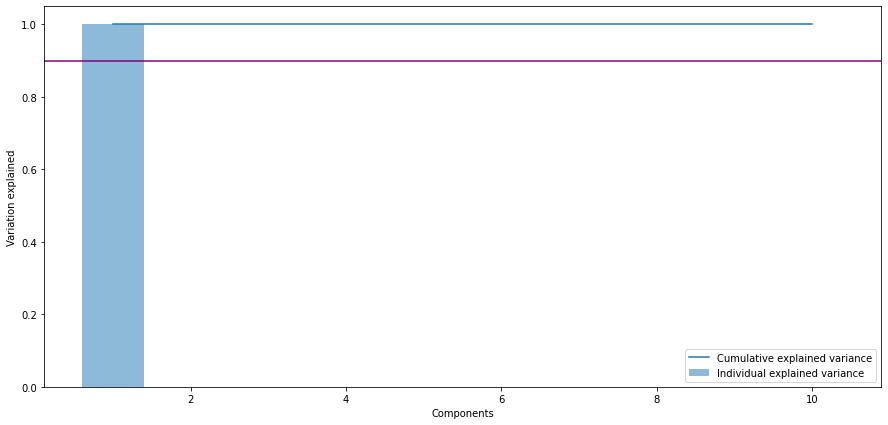

In [66]:
plt.figure(figsize=(15,7))
plt.ylabel('Variation explained')
plt.xlabel('Components')
plt.step(list(range(1,11)), np.cumsum(pca.explained_variance_ratio_), where='mid',label='Cumulative explained variance')
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5,label='Individual explained variance')
plt.legend(loc='best')
plt.axhline(y = 0.9, color = 'purple', linestyle = '-')
plt.show()

As we can see there is no improvement after pca 1, so theres no further need to create models using principal component analysis